<font size="+4">Lesson 3: The Drinking Game</font>
    
By the end of this lesson, you will know how to approach _any_ dynamic programming problem.
    
To demonstrate this method, we'll work on our first problem that really requires dynamic programming to solve which I have called 'The Drinking Game'.

Along the way you'll learn:
1. When to ignore, and what parts to ignore in the problem description
2. One common subproblem choosing strategy (we'll cover others later)
2. The 4 steps: Two steps to a correct solution, one more step to an efficient solution, and one further step for optional improvement.
    
    
The following video introduces the topic.  


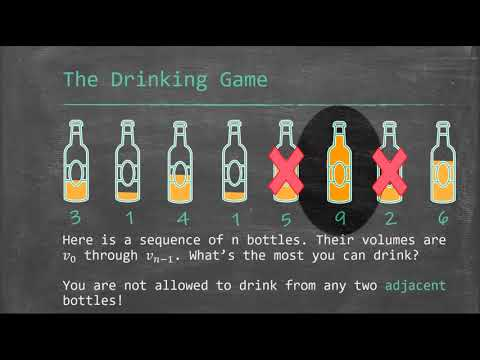

In [155]:
from IPython.display import YouTubeVideo
YouTubeVideo('B4201HEb3ro')

# The Four Steps to Creating a Dynamic Programming Algorithm

<figure>
    <img src="../images/drinking_game_bottles.png">
    <figcaption>Figure 1: You’re given a sequence of n bottles, the volumes of some (unidentified) liquid are $𝑣_0$ through $𝑣_{(𝑛−1)}$ . Drink as much as you can, given that you cannot drink from any two adjacent bottles.
    </figcaption>
</figure>
<p>

The drinking game is an easy to understand version of 'find the maximum weighted [independent set](https://en.wikipedia.org/wiki/Independent_set_(graph_theory)) on a line'. The bottles can be thought of as vertices in a graph as shown below. We want to find the heaviest set of vertices that are __not connected__ by an edge.

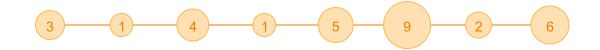

In [156]:
# Import package
from igraph import *

# a line tree with 8 nodes
g = Graph.Tree(8, 1)
g.vs["weight"] = [3, 1, 4, 1, 5, 9, 2, 6]


# draw the graph
#layout = g.layout("kk", )
layout = g.layout_grid(100, 0, 2)
#print(layout[0])

visual_style = {}
visual_style["vertex_size"] = [20 + 3*w for w in g.vs["weight"]]
visual_style["vertex_color"] = ["#FFE0B2"]
visual_style["vertex_frame_color"] = ["#FFB74D"]
visual_style["edge_color"] = ["#F57C00"]
visual_style["vertex_label"] = [str(w) for w in g.vs["weight"]]
visual_style["vertex_label_color"] = ["#F57C00"]
visual_style["vertex_label_dist"] = 0
visual_style["edge_width"] = [1]
visual_style["edge_length"] = [1]
visual_style["layout"] = layout
visual_style["bbox"] = (600, 50)
visual_style["margin"] = [50, 0, 50, 0]

plot(g, **visual_style)

## Examine all Possible Solutions (step 1)
This step begins with reading the problem statement. It ends when you have defined a recurrence relation. Along the way you have to discover how to break your problem into subproblems. It's a long step but in its essence you are using __brute force to look at all the valid solutions.__

The __bad news__ is that this first step is often the most difficult and this is the step that differs between easy and hard problems. The __good news__ is that once you complete this step, the algorithm almost writes itself.

I have broken down this step into a few sub-steps below

### Ignore Optimization
__Start this way:__ Read the problem statement and identify the optimization part. Look for key words such as 'most', 'least', 'longest', 'shortest', 'heaviest' etc. Just to get a start on the problem __IGNORE__ the optimization part (this is temporary - don't worry - we'll come back to the original problem very soon) and rephrase the question as one of finding all the valid possibilities. So for example, if you are asked to find 'the shortest path' - rephrase the question temporarily to 'find all the paths'.

In [157]:
%run quizzes/quiz.py quizzes/03/first_step.json

VBox(box_style='info', children=(HBox(children=(HTML(value='<style>p{word-wrap: break-word}</style> <p>As a fi…

### Choose the Subproblem Pattern
You are still ignoring the optimization requirement of the problem and trying to find all combinations that satisfy some constraint (in our case, that the bottles may not be adjacent). In this stage, you need to break up finding the combinations from _all_ the elements of the series, to finding those combinations of bottles in some finite number of subgroups.

The question is how to choose those subsets? One pattern is to choose the __first $i$ elements__.[<sup>1</sup>](#fn1)

If your input is: $x_1$, $x_2$, $x_3$, ... ,$x_n$, your subproblems will be of the form: $x_1$, $x_2$, $x_3$, ..., $x_i$

    +----------------------------+
    | x1   x2   x3  x4   x5   x6 |  x7   x8   x9   x10
    +----------------------------+

For the drinking game problem, we'll use this __prefix pattern__. Instead of looking for all the combinations of bottles in the set of all bottles, we'll form one or more subsets starting from the beginning of the series.

Now it remains to define the pattern of the subsets themselves. This is linked to the recurrence relation that we'll build.

### Divide Subproblems into Cases
In order to solve the problem by recursion, we need to define a recurrence relation. How do we discover this relation?

There are 3 ways:

1. __It's given to you!__ For example, to find the n'th Fibonacci you are given the definition: fib(1) = fib(2) = 1, fib(n) = fib(n-1) + fib(n-2).
2. __Build it from a given constraint.__ For example, 'no adjacent bottles'
3. __Add your own constraint, then build from that.__ Sometimes you're not given any constraint - the classic example is 'shortest path'[<sup>2</sup>](#fn2). We'll cover this super powerful technique of strengthening the induction hypothesis in later lessons.

In [158]:
%run quizzes/quiz.py quizzes/03/recurrence_discovery.json

VBox(box_style='info', children=(HBox(children=(HTML(value='<style>p{word-wrap: break-word}</style> <p>Which s…

Let's try to build a recurrence relation out of the given constraint (which is 'no adjacent bottles'). Think in terms of __cases__.

Since we're using the prefix pattern of subproblems, the key is to look at the __last bottle__. Either you __take that bottle or you don't.__

In [159]:
%run quizzes/quiz.py quizzes/03/recurrence_example.json

VBox(box_style='info', children=(HBox(children=(HTML(value='<style>p{word-wrap: break-word}</style> <p>In our …

You now have the following two cases and that leads you to the two parts of your recurrence relation:

1. You take the n'th bottle and choose from among the first n-2 bottles.
2. You DO NOT take the n'th bottle, and therefore you can choose from among the first n-1 bottles.

## Write the Recursive Algorithm (step 2)
In order to implement the recursive algorithm, we need to define a recurrence relation. Up until now, you have ignored the optimization part of the problem, but that was just a trick to be able to concentrate on setting up your subproblems.

### Add Optimization Back In
This is the point at which you __STOP ignoring the optimization__ request!! The problem asked to find the _most_ you can drink. So the recurrence relation will include _maximizing_ over the two cases you found above.

### Write the Recurrence Relatation
In the following quiz you will derive the complete recurrence relation including its base case.

In [160]:
%run quizzes/quiz.py quizzes/03/dg_rr.json

VBox(box_style='info', children=(HBox(children=(HTML(value="<style>p{word-wrap: break-word}</style> <p>If solv…

### Implement the Recursive Algorithm
Once you have the recurrence relation, the algorithm basically writes itself. The trick is to get to this point. Don't worry, we'll practice these steps over and over again in the following lessons.

Also, the recurrence relation will become clearer as you implement the algorithm in code.

<div class="exercise exercise-info">
Implement a recursive algorithm to solve the drinking game problem. It will run in exponential time, that's expected for this step. Starter code provided below. Note that the function <code>solve(v)</code> takes a zero based vector as input, so debug accordingly.
</div>

In [161]:
def solve(v):
    ### YOUR CODE ###
    return 0

#unit tests (hint: there are 3 base cases!)
## YOUR CASES HERE ###
#assert(solve([3, 1, 4, 1, 5, 9, 2, 6]) == 22)

## Write the Memoized Algorithm (step 3)
At this point you have a correct but inefficient algorithm. If the algorithm runs in exponential time it is not very useful in the real world! Remember that all memoization does is store the solutions of the subproblems so that they don't need to be calculated more than once.

<div class="exercise exercise-info">
Now implement the recursive, <b>memoized</b> algorithm to solve the drinking game problem. Starter code provided below.
</div>

In [162]:
def memoize(f):
    ## YOUR CODE ##
    return 0

@memoize
def solve(v):
    ### YOUR CODE ###
    return 0

#unit tests (hint: there are 3 base cases!)
## YOUR CASES HERE ###

#assert(solve([3, 1, 4, 1, 5, 9, 2, 6]) == 22)

## Write the Iterative Algorithm (step 4)
Although this step is optional in theory, in practice it's much better to run iterative code than recursive, because if n is very large you'll have a very, very deep call stack!

In [163]:
def iterate(f):
    ## YOUR CODE ##
    return 0

@iterate
def solve(v):
    ### YOUR CODE ###
    return 0

#unit tests (hint: there are 3 base cases!)
## YOUR CASES HERE ###

#assert(solve([3, 1, 4, 1, 5, 9, 2, 6]) == 22)

<div class="exercise exercise-info">
Try running your recursive memoized fibonacci algorithm with a large number and see what happens. Remove the comment in front of the magic %load command and run the cell. The solution code will be loaded into the cell and you can then experiment.
</div>

In [164]:
# %load solutions/02/fibonacci_memo_decorated.py

# More Practice Problems

## A Stingy Drinking Game

<div class="exercise exercise-info">
This problem is very, very similar to the original one. Solve it to cement the ideas you have just learned.
<br><br>
You’re given a sequence of n bottles, the volumes of some (unidentified) liquid are $𝑣_0$ through $𝑣_{(𝑛−1)}$ . Drink as much as you can - the rule is that the bottles you choose must be __two__ bottles apart. So if your volumes are [3, 1, 4, 1, 5, 9, 2, 6] and you choose bottle weighted 9, the only bottles you can now choose from would be the first three: [3, 1, 4] and from those you would only be able to choose one ...
<br><br>Your solution should run in linear time!  
</div>


Here's a checklist of all the steps to a solution

* [ ] Find and ignore the optimization word
* [x] Choose a subproblem pattern (spoiler: it's prefix, just like the first drinking game)
* [ ] Find the constraint(s)
* [ ] Use the given constraint to divide all the possible valid subproblems into cases
* [ ] Stop ignoring the optimization - do that optimization over the cases you found. Write the recurrence relation down.
* [ ] Implement the inefficient algorithm directly from the recurrence relation, paying attention to base cases, indices etc.
* [ ] Memoize the algorithm
* [ ] Convert to an iterative algorithm (optional)

In [165]:
def memoize(f):
    ## YOUR CODE ##
    return 0

@memoize
def solve_stingy(v):
    ### YOUR CODE ###
    return 0

#unit tests - base cases (hint: there are 4 base cases!)
## YOUR CASES HERE ###

#assert(solve_stingy([3, 1, 4, 1, 5, 9, 2, 6]) == 14)

## Largest Independant Set in a Tree

<div class="exercise exercise-info">

I could have called this: 'Drinking Game in a Tree' but that might be stretching the metaphor a bit much. In any case, this problem is just like the drinking game, except that instead of the bottles being in a line, they are placed in a tree. The problem is to find the maximum __size__ of the set of vertices in a tree graph that are not connected to each other (that's what independant means). For this problem, the vertices are not weighted.<br><br>

Thought exercises: <br>
* When the bottles were on a line, that was just a particular case of a tree where each node had at most how many children?
* Does it matter which node is the root of the tree?
* How would the recurrence relation change if the nodes _were_ weighted?
    
</div>

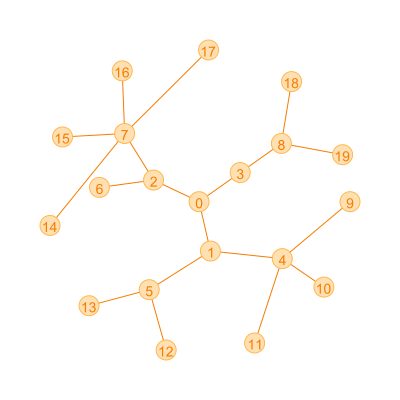

In [166]:
# a random tree with 16 nodes
edges = [(0, 1),(0, 2,), (0, 3),
        (1,4), (1,5),
        (2,6), (2,7),
        (3,8),
        (4,9), (4,10), (4,11),
        (5,12), (5,13),
        (7,14), (7,15), (7,16), (7,17),
        (8,18), (8,19)]
tree = Graph(edges=edges)

layout = tree.layout_reingold_tilford_circular(100, 0, 2)

tree.vs['label'] = [v.index for v in tree.vs]

visual_style["vertex_size"] = [20]
visual_style["vertex_label"] = [v.index for v in tree.vs]
visual_style["layout"] = layout
visual_style["bbox"] = (400, 400)
visual_style["margin"] = [50, 50, 50, 50]
plot(tree, **visual_style)

In [167]:
def memoize(f):
    ### YOUR CODE ###
    def helper(v):
        return helper

@memoize
def solve_lis(g):
    ## YOUR CODE ##
    return 0

#unit tests - base cases (theoretically there is just the empty tree as base case but it can simplify the code to have 3 base cases: 0, 1 & 2 nodes.)
## YOUR CASES HERE ###
# SOME EXAMPLE CASES
# g1 = Graph(edges=[(0, 1),(0, 2)])
# g2 = Graph(edges=[(0, 1),(0, 2), (0,3)])
# g3 = Graph(edges=[(0, 1),(0, 2), (2,3)])
# assert(solve_lis(g1) == 2)
# assert(solve_lis(g2) == 3)
# assert(solve_lis(g3) == 2)

# Solutions

<div class="exercise exercise-warning"><details><summary>Drinking game - non-memoized</summary>    
    
```python 
    
    # %load solutions/03/dg_max_value.py
    def solve(v):

        n = len(v)
        if n == 2:
            return max(v[0], v[1])
        elif n == 1:
            return v[0]
        elif n == 0:
            return 0

        return max(v[n-1] + solve(v[0: n - 2]), solve(v[0: n - 1]))

    # unit tests
    assert(solve([]) == 0)
    assert(solve([5]) == 5)
    assert(solve([5, 6]) == 6)
    assert(solve([5, 5, 5, 5, 5]) == 15)
    assert(solve([3, 1, 4, 1, 5, 9, 2, 6]) == 22)

```
    
</details>

<div class="exercise exercise-warning"><details><summary>Stingy drinking game - memoized</summary> 
    
```python 
    
    # %load solutions/03/stingy_memoized.py
    def memoize(f):
    memo = {}

    def helper(v):
        n = len(v)
        if n not in memo:
            memo[n] = f(v)
        return memo[n]

    return helper

    @memoize
    def solve_stingy(v):

        n = len(v)
        if n == 3:
            return max(v[0], v[1], v[2]) 
        elif n == 2:
            return max(v[0], v[1])
        elif n == 1:
            return v[0]
        elif n == 0:
            return 0

        return max(v[n-1] + solve_stingy(v[0: n - 3]), solve_stingy(v[0: n - 2]), solve_stingy(v[0: n - 1]))

    #unit tests
    assert(solve_stingy([]) == 0)
    assert(solve_stingy([3]) == 3)
    assert(solve_stingy([3, 1]) == 3)
    assert(solve_stingy([3, 1, 4]) == 4)
    assert(solve_stingy([3, 1, 4, 1, 5, 9, 2, 6]) == 14)

```
    
</details>

<div class="exercise exercise-warning"><details><summary>Largest independent set in a tree</summary> 
    
Let u be a node in the tree, and define I(u) to be the size of the maximum independant set of a tree that has u at its root.<br><br>
So we are looking at a subtree whose root is u.
    
    * It makes no difference which node is the root!
    * A line is just a tree where nodes have at most one child (0 or 1)
    
We will consider the children nodes and the grandchildren nodes of u. The recurrence relation is then:<br><br>
    
    <code>I(u) = max{ 1 + sum(I(w) for all grandchildren of u) + sum(I(w) for all children of u) }</code>
If the tree were weighted I(u) would be the maximum weight of an independant set with u at its root. Then you replace 1 with the weight of u:
    
    <code>I(u) = max{ weight(u) + sum(I(w) for all grandchildren of u) + sum(I(w) for all children of u) }</code>
    

<hr>
The implementation on a binary tree is here.
https://www.geeksforgeeks.org/largest-independent-set-problem-dp-26/
</details>

# Footnotes

<span id="fn1"></span>

    1. We will see other patterns in later lessons

<span id="fn2"></span>

    2. A more precise description of 'shortest path problem' is: find the shortest path from a single source to another vertex in an acyclical, non-negative weighted graph. Note that the description constrains the type of graph, there is no constraint on _which vertices_ may be included in the shortest path.


# References

1. Arnab Kundu. (2013, February 17). Largest Independent Set Problem | DP-26. GeeksforGeeks. https://www.geeksforgeeks.org/largest-independent-set-problem-dp-26/

2. Dasgupta, S., Papadimitriou, C. H., & Vazirani, U. V. (2008). Algorithms. McGraw-Hill Higher Education New York.

3. Forišek, M. (2015). Towards a better way to teach dynamic programming. Olympiads in Informatics, 9, 45–55.

4. The igraph core team. (2003, 2020). Getting started with python-igraph. https://igraph.org/python/

In [168]:
#workaround for known ipywidget issue not rendering alert style colours on Jupyter lab
from IPython.core.display import HTML
HTML(open("../styles/custom.css", "r").read())